(98, 31)
(98, 30) (98, 1)
(33, 31)
(33, 30) (33, 1)
Least square Cost
0.5042821
Train Accuracy:  0.7346939
Test Accuracy:  0.75757575


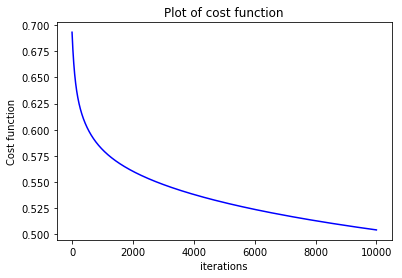

15
Sensitivity 0.7894736842105263
Specificity 0.7142857142857143
[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]


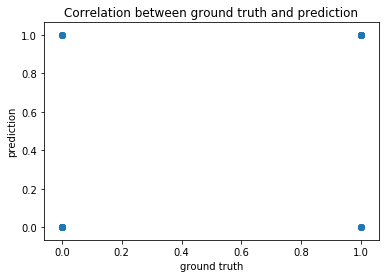

In [ ]:
#Binary Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from __future__ import division
import tensorflow as tf

def sigmoid(x):
    return expit(x)

def log_reg_model(X_train, Y_train,X_test,Y_test):
    N=X_train.shape[0] #No of training inputs
    M=X_train.shape[1] #No. of features
    learning_rate = 0.1
    epochs =10000

    
    #set placeholders
    X = tf.placeholder(tf.float32,[None, M])
    Y = tf.placeholder(tf.float32,[None, 1])
    
    #initialize weights
    weights = tf.Variable(tf.zeros([M,1]))
    
    # predict y
    y_pred = tf.sigmoid(tf.matmul(X,weights))
    
    #cost
    cost = -tf.reduce_mean(Y * tf.log(y_pred) + (1 - Y) * tf.log(1 - y_pred))
    
    #optimize using gradient descent
    train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
    #predict
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    
    #compute accuracy
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
    
    #ceate a tensorflow session and initialize variable
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
                          
  
   
    J_values=np.zeros(epochs) #to store cost at each epoch
   
    #Train
    for i in range(epochs):
        res=sess.run([train_op,cost], feed_dict={X:X_train, Y:Y_train})
        J_values[i]=res[1]
      
    print("Least square Cost")
    print(res[1])
    
    
    p, a = sess.run([ predicted, accuracy],
                       feed_dict={X: X_train, Y: Y_train})
    print("Train Accuracy: ", a)
    
    
    Y_pred, a,Y_true = sess.run([ predicted, accuracy,Y],
                       feed_dict={X: X_test, Y: Y_test})
    print("Test Accuracy: ", a)
    
    #plot of cost function
    fig1= plt.figure()
    plt.plot(np.arange(i+1),J_values,'b')
    plt.xlabel("iterations")
    plt.ylabel("Cost function")
    plt.title("Plot of cost function")
    plt.show()
    
    #compute Sensititivity and specificity
    
    TP = np.sum(np.logical_and(Y_pred == 1, Y_true== 1))
    TN = np.sum(np.logical_and(Y_pred == 0, Y_true == 0))
    FP = np.sum(np.logical_and(Y_pred == 1, Y_true == 0))
    FN = np.sum(np.logical_and(Y_pred == 0, Y_true == 1))
    print(TP)
    print("Sensitivity",TP/(TP+FN))
    print("Specificity",TN/(TN+FP))
    print(Y_pred)
    
    #find the correlation coefficient between prediction and ground truth
    xl=Y_pred.flatten()
    yl=Y_true.flatten()
    inds = xl.argsort()
    yls= yl[inds]
    xls=xl[inds]
    
    
    plt.scatter(Y_true,Y_pred)
    plt.xlabel("ground truth")
    plt.ylabel("prediction")
    plt.title("Correlation between ground truth and prediction")
    plt.show()
    
def plot_corr(df):
    
    print(df.drop(labels='OS', axis=1).corrwith(df['OS']))
    '''
    plt.figure(figsize=(15,15))
    plt.matshow(df.corr(),fignum=1)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)
    plt.colorbar()
    plt.show()
    '''

    


def get_dataset(data):
    
    dfo=pd.read_csv(data).astype('float32')
    #plot_corr(dfo)
    df = (dfo - dfo.mean()) / (dfo.max() - dfo.min())
    print(df.shape)
    X=df[df.columns[0:30]]
    
    
    df['y']=np.where(dfo['OS']<300, '0', '1')
    Y=pd.DataFrame(df['y'])
    #A=df[df['y']==0]
    #B=df[df['y']==1]
    return X,Y
        
X_train, Y_train=get_dataset("30_train_features.csv")
print(X_train.shape,Y_train.shape)
X_test, Y_test=get_dataset("30_test_features.csv")
print(X_test.shape,Y_test.shape)
log_reg_model(X_train, Y_train,X_test,Y_test)
#test(X_train, Y_train,X_test,Y_tes
 #

In [ ]:
a=np.array([1,2,3,4,6,7,8,9])
print(a.shape)
np.corrcoef(a,a)

(8,)


array([[1., 1.],
       [1., 1.]])